IMOPRTING  IMPORTANT LIBARARIES

In [21]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

LOADING DATASET

In [22]:

iris_data = pd.read_csv("IRIS.csv")
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


CHECKING MISSING VALUES

In [26]:

iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

CHECKING OUTLIERS

In [27]:
numcol=iris_data.select_dtypes(["int64","float64"]).columns
catcol=iris_data.select_dtypes(["object"]).columns

In [28]:
numcol

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [29]:
catcol

Index(['species'], dtype='object')

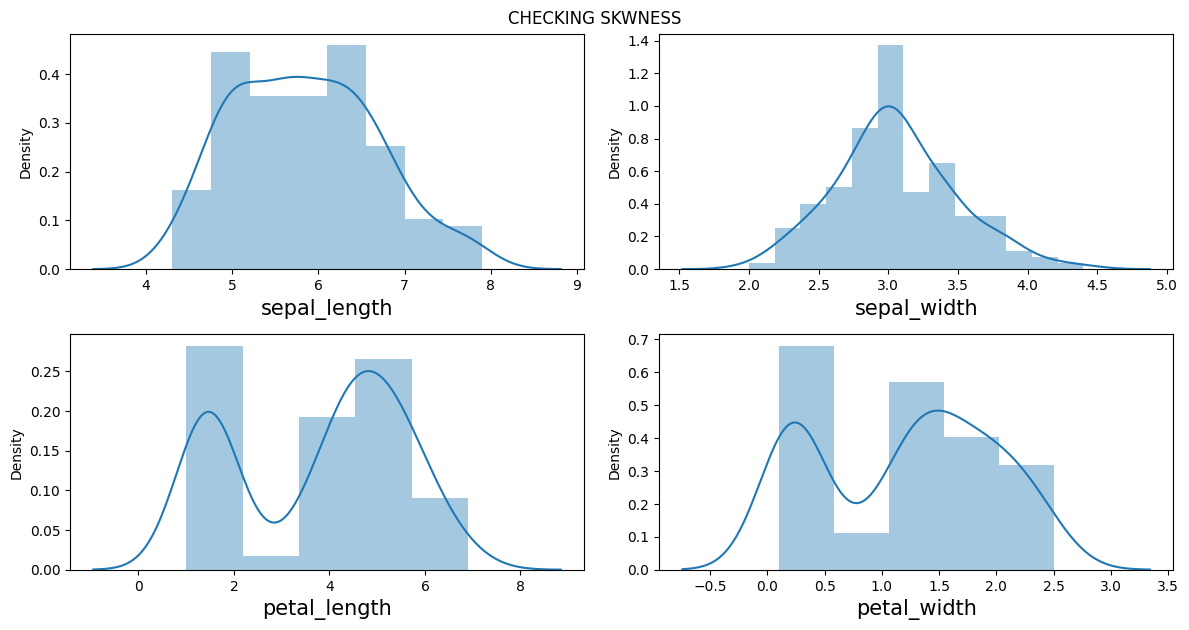

In [30]:
plt.figure(figsize=(12,12))
plt.suptitle("CHECKING SKWNESS")
pltn=1
for i in numcol:
 if pltn<=4:
   ax=plt.subplot(4,2,pltn)
   sns.distplot(iris_data[i])
   plt.xlabel(i,fontsize=15)
   pltn=pltn+1
plt.tight_layout()

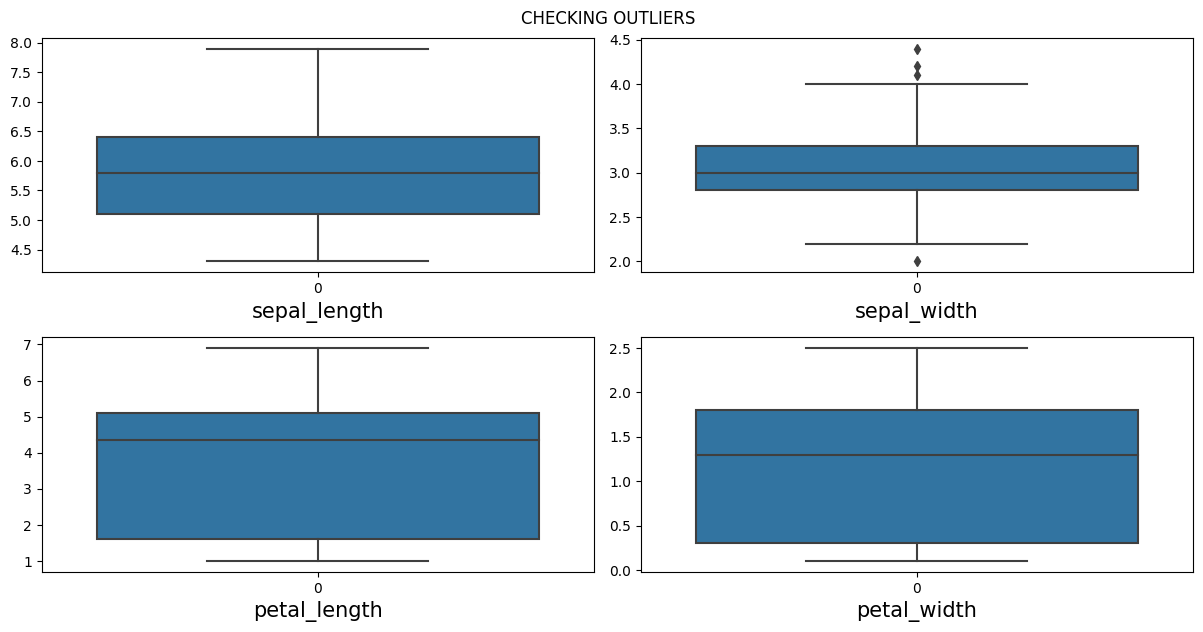

In [31]:
plt.figure(figsize=(12,12))
plt.suptitle("CHECKING OUTLIERS")
pltn=1
for i in numcol:
 if pltn<=4:
  ax=plt.subplot(4,2,pltn)
  sns.boxplot(iris_data[i])
  plt.xlabel(i,fontsize=15)
  pltn=pltn+1
plt.tight_layout()

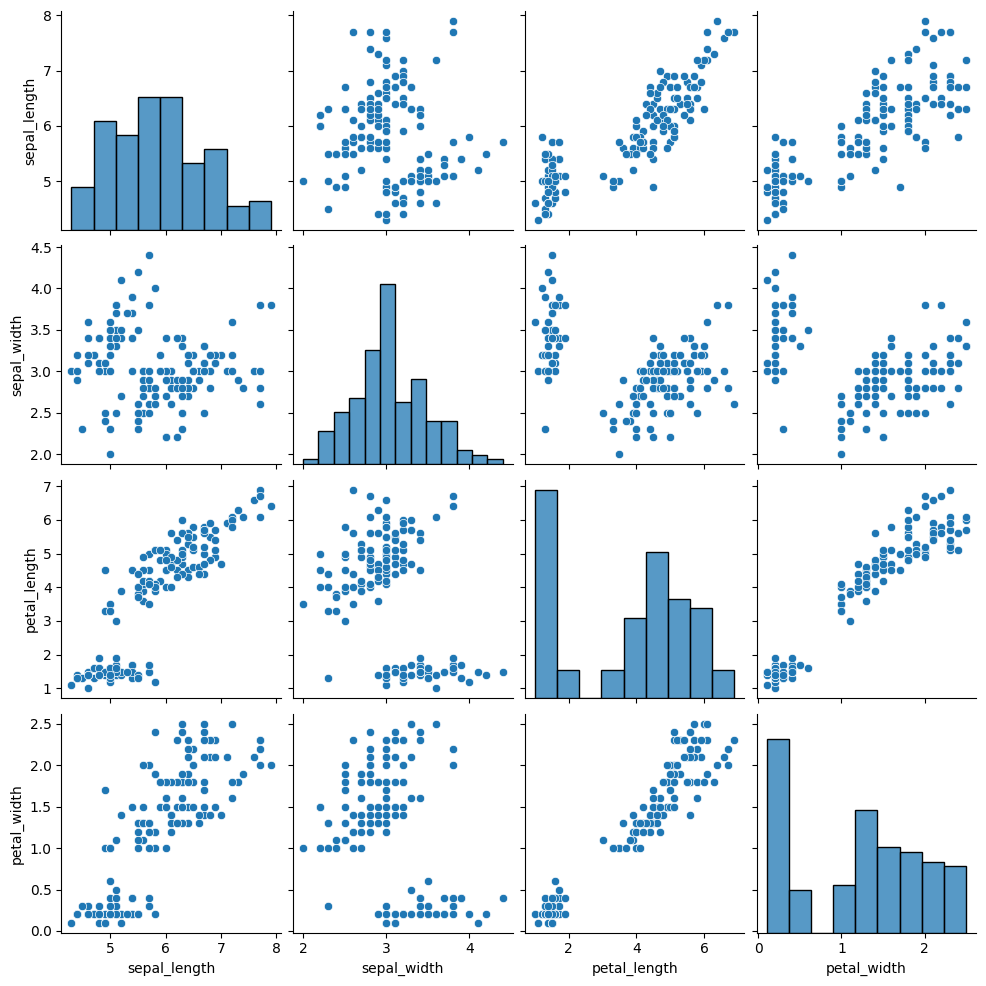

In [32]:
sns.pairplot(iris_data)

<AxesSubplot: >

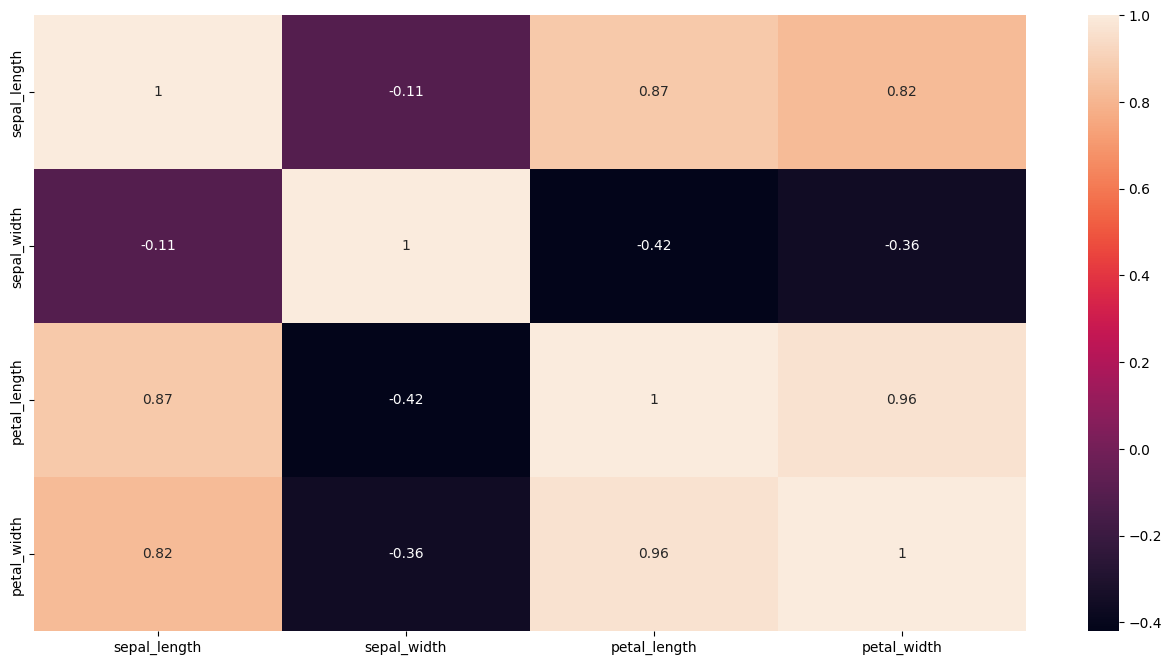

In [33]:
plt.figure(figsize=(16,8))
sns.heatmap(iris_data.corr(),annot=True)

SEPEARTING FEATURES AND TARGET

In [34]:
x = iris_data.drop("species",axis=1)
y = iris_data["species"]

SPLITTING TRAIN AND TEST DATA

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [36]:
# Stadardize the features 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

MODEL TRAINING AND EVALUATION

In [38]:
def mymodel(model):
 
 model.fit(x_train,y_train)
 y_pred=model.predict(x_test)
 train=model.score(x_train,y_train)
 test=model.score(x_test,y_test)
 print(f"Training score:{train}\nTesting score:{test}")
 print(classification_report(y_test,y_pred))
 return model

In [39]:
#KNeighborsClassifier
knn=mymodel(KNeighborsClassifier())

Training score:0.9583333333333334
Testing score:1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [40]:
#LogisticRegression
lr=mymodel(LogisticRegression())

Training score:0.9666666666666667
Testing score:1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [41]:
#DecisionTreeClassifier
dtc=mymodel(DecisionTreeClassifier())

Training score:1.0
Testing score:1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [42]:
#RandomForestClassifier
rfr=mymodel(RandomForestClassifier())

Training score:1.0
Testing score:1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

